# Heatmap voor correlaties in de dataset (materialized view)

In [1]:
import os
import pyodbc
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from matplotlib import pyplot as plt
from sqlalchemy import create_engine, text
from sklearn.preprocessing import LabelEncoder

In [2]:
load_dotenv()
DB_URL = os.getenv("DB_URL")
engine = create_engine(DB_URL)

try:
    connection = engine.connect()
    print("Connection made")
except Exception as e:
    print(e)

Connection made


In [3]:
file_path = "../src/repository/materialized_view.sql"
with open(file_path, 'r') as file:
    sql_file = file.read() # zet de inhoud van de materialized_view.sql file in een string
    
result = connection.execute(text(sql_file)) # voer de sql code uit
df = pd.DataFrame(result.fetchall(), columns=result.keys()) # zet de resultaten in een dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580981 entries, 0 to 580980
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   PersoonId                           580981 non-null  object
 1   ThemaDuurzaamheid                   580981 non-null  int64 
 2   ThemaFinancieelFiscaal              580981 non-null  int64 
 3   ThemaInnovatie                      580981 non-null  int64 
 4   ThemaInternationaalOndernemen       580981 non-null  int64 
 5   ThemaMobiliteit                     580981 non-null  int64 
 6   ThemaOmgeving                       580981 non-null  int64 
 7   ThemaSalesMarketingCommunicatie     580981 non-null  int64 
 8   ThemaStrategieEnAlgemeenManagement  580981 non-null  int64 
 9   ThemaTalent                         580981 non-null  int64 
 10  ThemaWelzijn                        580981 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 4

In [5]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column].astype(str))
    if df[column].dtype == 'datetime64[ns]':
        df[column] = df[column].astype('int64') // 10**9

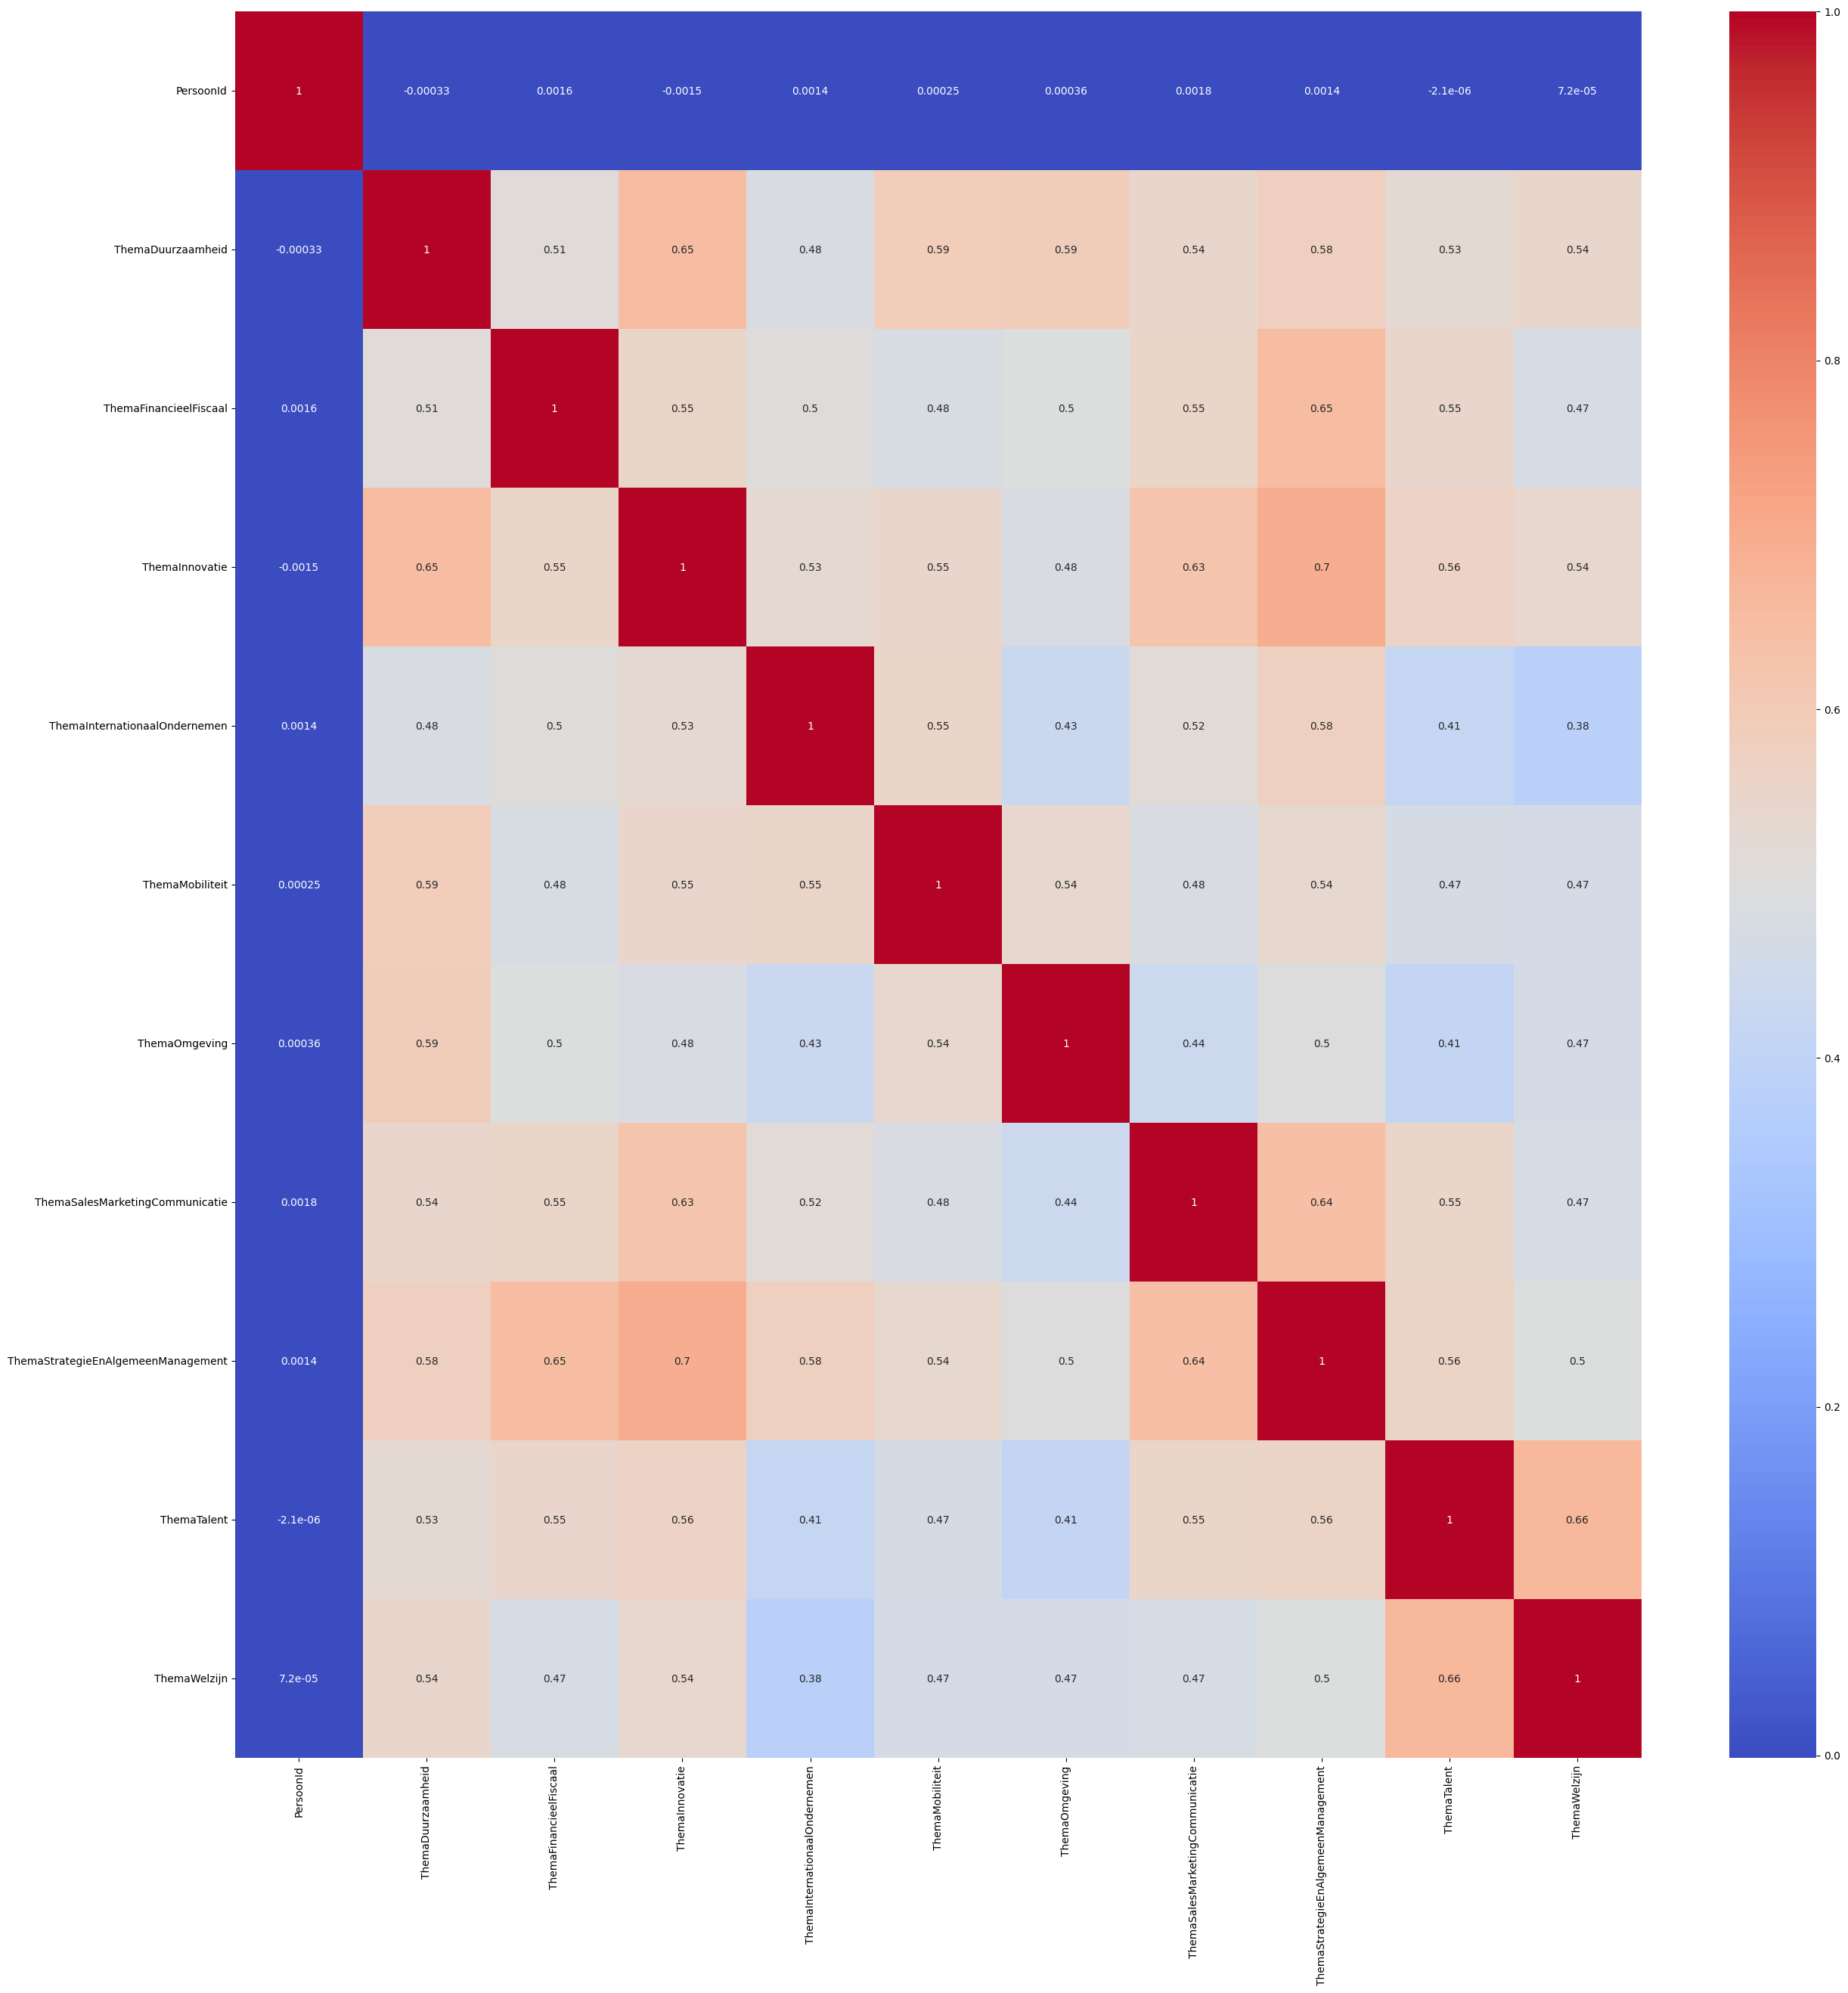

In [6]:
corr = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()